Q.1 Python Loops

In [1]:
import pandas as pd
sales_data= pd.read_csv('sales_data.csv')
sales_data.head()

,Order ID,Order Date,Region,Product Category,Sales Channel,Sales,Revenue,Profit,Quantity,Discount
0,1001,1/10/2023,North,Electronics,In-Store,2902.78,3129.92,25.63,91,26.48
1,1002,25/11/2024,South,Electronics,In-Store,4046.62,4309.67,194.78,57,27.66
2,1003,18/6/2024,East,Office Supplies,Online,3824.79,4259.34,170.28,27,3.14
3,1004,13/3/2024,East,Electronics,In-Store,854.11,1057.11,11.33,75,3.86
4,1005,24/4/2023,East,Electronics,Online,831.32,1272.66,377.32,5,16.71


In [2]:
total_rev= 0
for index, rows in sales_data.iterrows(): #to go through each row(or, row by row) in a dataframe usin '.iterrow()'
    #to go through all columns of a row using 'rows' and to go all rows following by indices using 'index'
    total_rev += rows["Revenue"]
print("Total Revenue: ", total_rev)


Total Revenue:  2795425.219999999


Q.2 Python Conditionals

In [3]:
def high_profit(id):
    order_data= sales_data[sales_data['Order ID']== id]
    if not order_data.empty:
        profit= order_data['Profit'].values[0]
        return profit > 300
    else:
        return "Id not found."
Input = int(input("Enter Order Id: "))
print(high_profit(Input))
    

ValueError: invalid literal for int() with base 10: 'k'

Q.3 Python Functions

In [4]:
def avg_rev():
    product_category= input("Enter product category: ")
    category_data= sales_data[sales_data['Product Category']==product_category]
    if not category_data.empty:
        average_rev= category_data['Revenue'].mean()
        return f"Average of {product_category}: ${average_rev:.2f}"
    else:
        "Product is not found."
print(avg_rev())

None


In [5]:
import numpy as np
sales_data["Customer Rating"] = np.random.randint(0, 10, size=(1000, 1))
sales_data.head(2)

,Order ID,Order Date,Region,Product Category,Sales Channel,Sales,Revenue,Profit,Quantity,Discount,Customer Rating
0,1001,1/10/2023,North,Electronics,In-Store,2902.78,3129.92,25.63,91,26.48,9
1,1002,25/11/2024,South,Electronics,In-Store,4046.62,4309.67,194.78,57,27.66,0


Q.4 Create a Matrix

In [6]:
regions= sales_data["Region"].unique()
categories= sales_data["Product Category"].unique()
sales_data_matrix= np.random.randint(0, 1000, size=(len(regions), len(categories)))
sales_data_df= pd.DataFrame(sales_data_matrix, index=regions, columns=categories) #for better visualization
sales_data_df

,Electronics,Office Supplies,Furniture
North,366,592,428
South,214,378,112
East,835,459,859
West,708,122,561


Q.5 Transpose and Manipulate

In [7]:
regions= sales_data["Region"].unique()
categories= sales_data["Product Category"].unique()
# Create an empty matrix (rows: regions, columns: product categories)
sales_data_matrix= np.zeros((len(regions), len(categories)))
# Populate the matrix with actual sales data
for i, region in enumerate(regions):
    for j, category in enumerate(categories):
        # Filter sales data for each region-category pair and sum up the sales
        total_sales= sales_data[(sales_data["Region"]== region) & (sales_data["Product Category"]== category)]["Sales"].sum()
        sales_data_matrix[i,j]= total_sales
transposed_matrix= sales_data_matrix.T
Total_sales_categorywise= transposed_matrix.sum(axis=1)
Sales_Data_df= pd.DataFrame(transposed_matrix, index= categories, columns=regions)
Sales_Data_df["Total Sales"] = Total_sales_categorywise
Sales_Data_df

,North,South,East,West,Total Sales
Electronics,464350.58,399088.77,303295.12,84573.11,1251307.58
Office Supplies,154206.98,184052.14,120613.61,64760.40,523633.13
Furniture,325480.98,212625.93,122946.54,85122.02,746175.47


Q.6  Advanced NumPy

In [8]:
max_val= np.max(transposed_matrix)
min_val= np.min(transposed_matrix)

#to avoid NaN or infinite values that can occur if denominator become zero (means if all values of the matrix are same.)
if max_val>min_val:
    normalized_matrix= (transposed_matrix-min_val)/(max_val-min_val)
else:
    normalized_matrix= np.zeros_like(transposed_matrix) #to store all values as '0'(zero matrix) if 'max value== min value'(means all values are same)
normalized_sales= pd.DataFrame(normalized_matrix, index= categories, columns= regions)
normalized_sales

,North,South,East,West
Electronics,1.000000,0.836678,0.596948,0.049583
Office Supplies,0.223846,0.298535,0.139776,0.000000
Furniture,0.652470,0.370043,0.145615,0.050956


In [9]:
unclean_data= pd.read_csv('final_unclean_data.csv')
unclean_data.head()

,Region,SalesRep,Month,CustomerRating,ComputerSales,AirConditionerSales,FridgeSales,TelevisionSales,Profit,CustomerSegment,SalesTargetAchieved,ComputerProfit,AirConditionerProfit,FridgeProfit,TelevisionProfit,ComputerDiscount%,AirConditionerDiscount%,FridgeDiscount%,TelevisionDiscount%
0,East,Charlie,Mar,AK-AK,NaN,999999,53,48,400038.10,Commercial,Yes,NaN,399999.6,26.5,12.00,27,16,19,3
1,West,Charlie,Mar,2,183.0,29,11,88,94.00,Commercial,No,54.9,11.6,5.5,22.00,24,8,8,13
2,North,Charlie,Mar,2,77.0,135,78,62,131.60,Residential,Yes,23.1,54.0,39.0,15.50,15,11,4,8
3,East,Bob,Jan,1,34.0,13,4,44,28.40,Residential,Yes,10.2,5.2,2.0,11.00,8,21,5,4
4,East,Diana,Mar,4,188.0,38,7,19,79.85,Residential,No,56.4,15.2,3.5,4.75,10,18,2,11


Q.7  Handle Missing Values

In [10]:
miss_val= unclean_data.isnull().sum() #to count missing values for each columns
miss_cols= miss_val[miss_val>0] #to show only columns with missing values
numeric_cols= unclean_data.select_dtypes(include=['number']).columns #to show column heads of columns containing numerical values
categoric_cols= unclean_data.select_dtypes(exclude=['number']).columns #to show column heads of columns containing object/str values
for col in numeric_cols:
    unclean_data[col].fillna(unclean_data[col].mean(), inplace= True)
for col in categoric_cols:
    unclean_data[col].fillna(unclean_data[col].mode()[0], inplace=True) #'[0]' is used cause if there are multiple mode it will return as series of those values. so, to extract the first value from that series we used [0]
unclean_data.head()

C:\Users\najmu\AppData\Local\Temp\ipykernel_12008\2999109351.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unclean_data[col].fillna(unclean_data[col].mean(), inplace= True)
C:\Users\najmu\AppData\Local\Temp\ipykernel_12008\2999109351.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

,Region,SalesRep,Month,CustomerRating,ComputerSales,AirConditionerSales,FridgeSales,TelevisionSales,Profit,CustomerSegment,SalesTargetAchieved,ComputerProfit,AirConditionerProfit,FridgeProfit,TelevisionProfit,ComputerDiscount%,AirConditionerDiscount%,FridgeDiscount%,TelevisionDiscount%
0,East,Charlie,Mar,AK-AK,104.593023,999999,53,48,400038.10,Commercial,Yes,31.377907,399999.6,26.5,12.00,27,16,19,3
1,West,Charlie,Mar,2,183.000000,29,11,88,94.00,Commercial,No,54.900000,11.6,5.5,22.00,24,8,8,13
2,North,Charlie,Mar,2,77.000000,135,78,62,131.60,Residential,Yes,23.100000,54.0,39.0,15.50,15,11,4,8
3,East,Bob,Jan,1,34.000000,13,4,44,28.40,Residential,Yes,10.200000,5.2,2.0,11.00,8,21,5,4
4,East,Diana,Mar,4,188.000000,38,7,19,79.85,Residential,No,56.400000,15.2,3.5,4.75,10,18,2,11


Q.8 Replace Unclean Data

In [11]:
invalid_value= 999999
median_val= unclean_data["AirConditionerSales"].median()
unclean_data["AirConditionerSales"]= unclean_data["AirConditionerSales"].replace(invalid_value, median_val)
unclean_data.head()


,Region,SalesRep,Month,CustomerRating,ComputerSales,AirConditionerSales,FridgeSales,TelevisionSales,Profit,CustomerSegment,SalesTargetAchieved,ComputerProfit,AirConditionerProfit,FridgeProfit,TelevisionProfit,ComputerDiscount%,AirConditionerDiscount%,FridgeDiscount%,TelevisionDiscount%
0,East,Charlie,Mar,AK-AK,104.593023,78,53,48,400038.10,Commercial,Yes,31.377907,399999.6,26.5,12.00,27,16,19,3
1,West,Charlie,Mar,2,183.000000,29,11,88,94.00,Commercial,No,54.900000,11.6,5.5,22.00,24,8,8,13
2,North,Charlie,Mar,2,77.000000,135,78,62,131.60,Residential,Yes,23.100000,54.0,39.0,15.50,15,11,4,8
3,East,Bob,Jan,1,34.000000,13,4,44,28.40,Residential,Yes,10.200000,5.2,2.0,11.00,8,21,5,4
4,East,Diana,Mar,4,188.000000,38,7,19,79.85,Residential,No,56.400000,15.2,3.5,4.75,10,18,2,11


Q.9+Q.10 Clean String Values & Fix Data Types

In [12]:
import numpy as np
invalid_value= "AK-AK"
unclean_data["CustomerRating"]= unclean_data["CustomerRating"].replace(invalid_value, np.nan)
unclean_data["CustomerRating"]= pd.to_numeric(unclean_data["CustomerRating"], errors= "coerce") #for Q.10 #ensures all values converted to numeric apart from 'AK-AK'.
#If any value cannot be converted 'errors= "coerce"' will replace them with NaN instead of throwing an error.
median_rating= unclean_data["CustomerRating"].median()
unclean_data["CustomerRating"].fillna(median_rating, inplace=True)
unclean_data.head()

C:\Users\najmu\AppData\Local\Temp\ipykernel_12008\796168179.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unclean_data["CustomerRating"].fillna(median_rating, inplace=True)


,Region,SalesRep,Month,CustomerRating,ComputerSales,AirConditionerSales,FridgeSales,TelevisionSales,Profit,CustomerSegment,SalesTargetAchieved,ComputerProfit,AirConditionerProfit,FridgeProfit,TelevisionProfit,ComputerDiscount%,AirConditionerDiscount%,FridgeDiscount%,TelevisionDiscount%
0,East,Charlie,Mar,2.0,104.593023,78,53,48,400038.10,Commercial,Yes,31.377907,399999.6,26.5,12.00,27,16,19,3
1,West,Charlie,Mar,2.0,183.000000,29,11,88,94.00,Commercial,No,54.900000,11.6,5.5,22.00,24,8,8,13
2,North,Charlie,Mar,2.0,77.000000,135,78,62,131.60,Residential,Yes,23.100000,54.0,39.0,15.50,15,11,4,8
3,East,Bob,Jan,1.0,34.000000,13,4,44,28.40,Residential,Yes,10.200000,5.2,2.0,11.00,8,21,5,4
4,East,Diana,Mar,4.0,188.000000,38,7,19,79.85,Residential,No,56.400000,15.2,3.5,4.75,10,18,2,11


Q.11 Remove Outliers

In [13]:
profit_cols= [col for col in unclean_data.columns if col.endswith("Profit")] #to filter columns' head with specific suffix 'profit'
def remove_outliers(df, column):
    Q1= df[column].quantile(0.25) #25th percentile
    Q3= df[column].quantile(0.75) #75th percentile
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR #lower limit
    upper_bound= Q3+1.5*IQR #upper limit
    df_cleaned= df[(df[column] > lower_bound) & (df[column] < upper_bound)] #filtered rows that falls under those limits
    return df_cleaned
for col in profit_cols:
    unclean_data= remove_outliers(unclean_data, col)
unclean_data.head()



,Region,SalesRep,Month,CustomerRating,ComputerSales,AirConditionerSales,FridgeSales,TelevisionSales,Profit,CustomerSegment,SalesTargetAchieved,ComputerProfit,AirConditionerProfit,FridgeProfit,TelevisionProfit,ComputerDiscount%,AirConditionerDiscount%,FridgeDiscount%,TelevisionDiscount%
1,West,Charlie,Mar,2.0,183.0,29,11,88,94.00,Commercial,No,54.9,11.6,5.5,22.00,24,8,8,13
2,North,Charlie,Mar,2.0,77.0,135,78,62,131.60,Residential,Yes,23.1,54.0,39.0,15.50,15,11,4,8
3,East,Bob,Jan,1.0,34.0,13,4,44,28.40,Residential,Yes,10.2,5.2,2.0,11.00,8,21,5,4
4,East,Diana,Mar,4.0,188.0,38,7,19,79.85,Residential,No,56.4,15.2,3.5,4.75,10,18,2,11
5,West,Eve,Feb,2.0,150.0,47,64,59,110.55,Commercial,No,45.0,18.8,32.0,14.75,5,19,5,10


In [14]:
#Another case to remove ouliers by replacing outliers values by NaN/median/mean/etc. instead of removing rows
profit_cols= [col for col in unclean_data.columns if col.endswith("Profit")]
for col in profit_cols:
    Q1= unclean_data[col].quantile(0.25)
    Q3= unclean_data[col].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    unclean_data[col]= np.where((unclean_data[col]<lower_bound) | (unclean_data[col]>upper_bound), 
                                round(unclean_data[col].median(), 2), unclean_data[col]) #we can replace values of a column conditionally by using 'np.where(cond., value_for_true, value_for_false)'

unclean_data.head()


,Region,SalesRep,Month,CustomerRating,ComputerSales,AirConditionerSales,FridgeSales,TelevisionSales,Profit,CustomerSegment,SalesTargetAchieved,ComputerProfit,AirConditionerProfit,FridgeProfit,TelevisionProfit,ComputerDiscount%,AirConditionerDiscount%,FridgeDiscount%,TelevisionDiscount%
1,West,Charlie,Mar,2.0,183.0,29,11,88,94.00,Commercial,No,54.9,11.6,5.5,22.00,24,8,8,13
2,North,Charlie,Mar,2.0,77.0,135,78,62,131.60,Residential,Yes,23.1,54.0,39.0,15.50,15,11,4,8
3,East,Bob,Jan,1.0,34.0,13,4,44,28.40,Residential,Yes,10.2,5.2,2.0,11.00,8,21,5,4
4,East,Diana,Mar,4.0,188.0,38,7,19,79.85,Residential,No,56.4,15.2,3.5,4.75,10,18,2,11
5,West,Eve,Feb,2.0,150.0,47,64,59,110.55,Commercial,No,45.0,18.8,32.0,14.75,5,19,5,10


Q.12 Reshape Data

In [15]:
sales_cols= ["ComputerSales", "AirConditionerSales", "FridgeSales", "TelevisionSales"]
data_long= unclean_data.melt(id_vars= [col for col in unclean_data.columns if col not in sales_cols], #columns those will not be changed and remain same and should be in'[]' as 'id_vars=' argument expects list like object.
                             value_vars= sales_cols, #columns that we want to combine stored in an array var
                             var_name= "Product", #name for the new column where we will combine those columns
                             value_name= "Sales") #name for the column where those columns' values will be stored 
#'.melt()' func for long data conversion and 'id_vars=', 'value_vars=', 'var_name=' and 'value_name=' are fixed arguments for this func.
data_long.head()

,Region,SalesRep,Month,CustomerRating,Profit,CustomerSegment,SalesTargetAchieved,ComputerProfit,AirConditionerProfit,FridgeProfit,TelevisionProfit,ComputerDiscount%,AirConditionerDiscount%,FridgeDiscount%,TelevisionDiscount%,Product,Sales
0,West,Charlie,Mar,2.0,94.00,Commercial,No,54.9,11.6,5.5,22.00,24,8,8,13,ComputerSales,183.0
1,North,Charlie,Mar,2.0,131.60,Residential,Yes,23.1,54.0,39.0,15.50,15,11,4,8,ComputerSales,77.0
2,East,Bob,Jan,1.0,28.40,Residential,Yes,10.2,5.2,2.0,11.00,8,21,5,4,ComputerSales,34.0
3,East,Diana,Mar,4.0,79.85,Residential,No,56.4,15.2,3.5,4.75,10,18,2,11,ComputerSales,188.0
4,West,Eve,Feb,2.0,110.55,Commercial,No,45.0,18.8,32.0,14.75,5,19,5,10,ComputerSales,150.0


To ans Q.13(Feature Engineering) we need to create long data for sales, profit and discounts of products and then need to merge those long datasets(to avoid duplicate values problem (means, many to many join) in the merged dataset we create a column named 'Index' to the main dataset to see if the sorting of our data is consistent or not and then before doing merging we add another column named 'Index2' to each long dataset to get the proper joining/merging based on the 'Index2'(to keep one to one join)) 

In [16]:
#to get proper merging of datasets add we need to create an index column to the main dataframe
df= unclean_data
df['Index']= range(1, len(df)+1) #add an index column ranges from 1 to last row of df(+1 as 'range()' exclude the last)
df.head()

,Region,SalesRep,Month,CustomerRating,ComputerSales,AirConditionerSales,FridgeSales,TelevisionSales,Profit,CustomerSegment,SalesTargetAchieved,ComputerProfit,AirConditionerProfit,FridgeProfit,TelevisionProfit,ComputerDiscount%,AirConditionerDiscount%,FridgeDiscount%,TelevisionDiscount%,Index
1,West,Charlie,Mar,2.0,183.0,29,11,88,94.00,Commercial,No,54.9,11.6,5.5,22.00,24,8,8,13,1
2,North,Charlie,Mar,2.0,77.0,135,78,62,131.60,Residential,Yes,23.1,54.0,39.0,15.50,15,11,4,8,2
3,East,Bob,Jan,1.0,34.0,13,4,44,28.40,Residential,Yes,10.2,5.2,2.0,11.00,8,21,5,4,3
4,East,Diana,Mar,4.0,188.0,38,7,19,79.85,Residential,No,56.4,15.2,3.5,4.75,10,18,2,11,4
5,West,Eve,Feb,2.0,150.0,47,64,59,110.55,Commercial,No,45.0,18.8,32.0,14.75,5,19,5,10,5


In [17]:
# now we need to add the new 'Index' column to each long dataset

sale_cols= df.columns[4:8] #to call columns' names by their index position(like 0,1,2,...)
unchanged_cols= list(df.columns[0:4])+list(df.columns[9:11]) #we use the 'list()' func. to convert column indices into pandas list so that we can concatenate(+) diff. positioned columns' names and another reason is 'id_vars=' arg expects list.
sales_long= df.melt(id_vars= unchanged_cols + ['Index'], #to add 'Index' column to remain unchanged
                             value_vars= sale_cols,
                             var_name= "Product",
                             value_name= "Sales") 
sales_long.head()

,Region,SalesRep,Month,CustomerRating,CustomerSegment,SalesTargetAchieved,Index,Product,Sales
0,West,Charlie,Mar,2.0,Commercial,No,1,ComputerSales,183.0
1,North,Charlie,Mar,2.0,Residential,Yes,2,ComputerSales,77.0
2,East,Bob,Jan,1.0,Residential,Yes,3,ComputerSales,34.0
3,East,Diana,Mar,4.0,Residential,No,4,ComputerSales,188.0
4,West,Eve,Feb,2.0,Commercial,No,5,ComputerSales,150.0


In [18]:
profits_cols= ['ComputerProfit', 'AirConditionerProfit', 'FridgeProfit', 'TelevisionProfit']
unchanged_cols= list(df.columns[0:4])+list(df.columns[9:11])
profit_long= df.melt(id_vars= unchanged_cols + ['Index'],
                             value_vars= profits_cols,
                             var_name= "Product",
                             value_name= "Profits") 
profit_long.head()

,Region,SalesRep,Month,CustomerRating,CustomerSegment,SalesTargetAchieved,Index,Product,Profits
0,West,Charlie,Mar,2.0,Commercial,No,1,ComputerProfit,54.9
1,North,Charlie,Mar,2.0,Residential,Yes,2,ComputerProfit,23.1
2,East,Bob,Jan,1.0,Residential,Yes,3,ComputerProfit,10.2
3,East,Diana,Mar,4.0,Residential,No,4,ComputerProfit,56.4
4,West,Eve,Feb,2.0,Commercial,No,5,ComputerProfit,45.0


In [19]:
discount_cols= df.columns[-5:-1]
unchanged_cols= list(df.columns[0:4])+list(df.columns[9:11])
discount_long= df.melt(id_vars= unchanged_cols + ['Index'],
                             value_vars= discount_cols,
                             var_name= "Product",
                             value_name= "Discount%")
discount_long.head()

,Region,SalesRep,Month,CustomerRating,CustomerSegment,SalesTargetAchieved,Index,Product,Discount%
0,West,Charlie,Mar,2.0,Commercial,No,1,ComputerDiscount%,24
1,North,Charlie,Mar,2.0,Residential,Yes,2,ComputerDiscount%,15
2,East,Bob,Jan,1.0,Residential,Yes,3,ComputerDiscount%,8
3,East,Diana,Mar,4.0,Residential,No,4,ComputerDiscount%,10
4,West,Eve,Feb,2.0,Commercial,No,5,ComputerDiscount%,5


In [20]:
#making the common column 'Product' by removing uncommon string
sales_long["Product"]= sales_long["Product"].str.replace('Sales','',regex= False) #to replace a specific text/word from a column with text/string need to use '.str.replace()'#'regex=F' when we replace text
discount_long["Product"]= discount_long["Product"].str.replace('Discount%','',regex= False)
profit_long["Product"]= profit_long["Product"].str.replace('Profit','',regex= False)


In [21]:
#adding another column named 'Index2'
sales_long['Index2']= range(1, len(sales_long)+1)
discount_long['Index2']= range(1, len(discount_long)+1)
profit_long['Index2']= range(1, len(profit_long)+1)

In [22]:
sales_long.columns

Index(['Region', 'SalesRep', 'Month', 'CustomerRating', 'CustomerSegment',
       'SalesTargetAchieved', 'Index', 'Product', 'Sales', 'Index2'],
      dtype='object')

In [23]:
#merging 3 datasets
sales_profit_merged= pd.merge(sales_long, profit_long, on=['Region', 'SalesRep', 'Month', 'CustomerRating', 'CustomerSegment',
       'SalesTargetAchieved', 'Product', 'Index', 'Index2'])
merged_final= pd.merge(sales_profit_merged, discount_long, on=['Region', 'SalesRep', 'Month', 'CustomerRating', 'CustomerSegment',
       'SalesTargetAchieved', 'Product', 'Index', 'Index2'])

In [24]:
merged_final.head()

,Region,SalesRep,Month,CustomerRating,CustomerSegment,SalesTargetAchieved,Index,Product,Sales,Index2,Profits,Discount%
0,West,Charlie,Mar,2.0,Commercial,No,1,Computer,183.0,1,54.9,24
1,North,Charlie,Mar,2.0,Residential,Yes,2,Computer,77.0,2,23.1,15
2,East,Bob,Jan,1.0,Residential,Yes,3,Computer,34.0,3,10.2,8
3,East,Diana,Mar,4.0,Residential,No,4,Computer,188.0,4,56.4,10
4,West,Eve,Feb,2.0,Commercial,No,5,Computer,150.0,5,45.0,5


In [25]:
merged_final.to_csv("Merged_Data.csv", index=False)

In [26]:
#adding a new column by generating random nums vary from 50 to 120 named 'Cost'
merged_final["Cost"]= np.random.randint(50, 121, size=len(merged_final))

Q.13 Feature Engineering

In [27]:
#Still CONFUSION!!!!!
merged_final["Net Profit"]= round(merged_final["Cost"]-merged_final["Sales"]*(1-(merged_final["Discount%"])/100), 2)
merged_final.head()

,Region,SalesRep,Month,CustomerRating,CustomerSegment,SalesTargetAchieved,Index,Product,Sales,Index2,Profits,Discount%,Cost,Net Profit
0,West,Charlie,Mar,2.0,Commercial,No,1,Computer,183.0,1,54.9,24,65,-74.08
1,North,Charlie,Mar,2.0,Residential,Yes,2,Computer,77.0,2,23.1,15,61,-4.45
2,East,Bob,Jan,1.0,Residential,Yes,3,Computer,34.0,3,10.2,8,111,79.72
3,East,Diana,Mar,4.0,Residential,No,4,Computer,188.0,4,56.4,10,65,-104.20
4,West,Eve,Feb,2.0,Commercial,No,5,Computer,150.0,5,45.0,5,113,-29.50


Q.14 Bar Chart

In [28]:
clean_data= pd.read_csv("clean_data.csv")
clean_data.head()

,Region,SalesRep,Month,CustomerRating,ComputerSales,AirConditionerSales,FridgeSales,TelevisionSales,Profit,CustomerSegment,SalesTargetAchieved,ComputerProfit,AirConditionerProfit,FridgeProfit,TelevisionProfit,ComputerDiscount%,AirConditionerDiscount%,FridgeDiscount%,TelevisionDiscount%
0,West,Charlie,Mar,2.0,183.0,29,11,88,94.00,Commercial,No,54.9,11.6,5.5,22.00,24,8,8,13
1,North,Charlie,Mar,2.0,77.0,135,78,62,131.60,Residential,Yes,23.1,54.0,39.0,15.50,15,11,4,8
2,East,Bob,Jan,1.0,34.0,13,4,44,28.40,Residential,Yes,10.2,5.2,2.0,11.00,8,21,5,4
3,East,Diana,Mar,4.0,188.0,38,7,19,79.85,Residential,No,56.4,15.2,3.5,4.75,10,18,2,11
4,West,Eve,Feb,2.0,150.0,47,64,59,110.55,Commercial,No,45.0,18.8,32.0,14.75,5,19,5,10


C:\Users\najmu\AppData\Local\Temp\ipykernel_12008\2633447714.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= total_sales.index, y= total_sales.values, palette="viridis") #using seaborn to plot


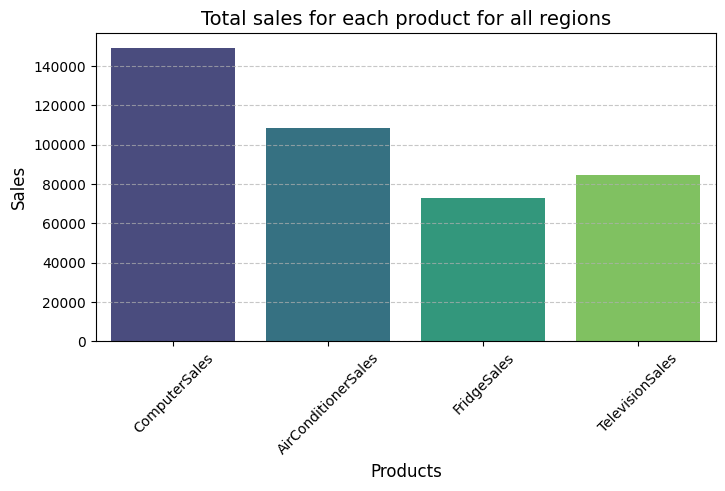

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sales_columns= ["ComputerSales", "AirConditionerSales", "FridgeSales", "TelevisionSales"]
total_sales= clean_data[sales_columns].sum()
plt.figure(figsize=(8, 4))
sns.barplot(x= total_sales.index, y= total_sales.values, palette="viridis") #using seaborn to plot
plt.title("Total sales for each product for all regions", fontsize= 14)
plt.xlabel("Products", fontsize= 12)
plt.ylabel("Sales", fontsize= 12)
plt.xticks(rotation= 45)
plt.grid(axis='y', linestyle= '--', alpha= 0.7)
plt.show()


C:\Users\najmu\AppData\Local\Temp\ipykernel_12008\1049789446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= product_sales['Product'], y= product_sales['Sales'], palette="viridis") #using seaborn to plot


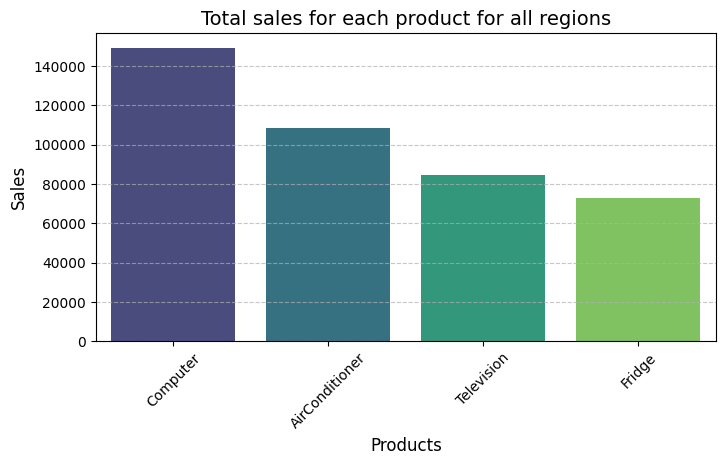

In [30]:
#for Merged dataset
product_sales= merged_final.groupby('Product')['Sales'].sum().reset_index() #after using 'groupby()' the categorical column turned out as an index column. so, to convert it as regular col we used '.reset_index()'
product_sales= product_sales.sort_values(by='Sales', ascending= False) #to get sales values in descending order we use '.sort_values(by=, ascending=False)'

plt.figure(figsize=(8, 4))
sns.barplot(x= product_sales['Product'], y= product_sales['Sales'], palette="viridis") #using seaborn to plot
plt.title("Total sales for each product for all regions", fontsize= 14)
plt.xlabel("Products", fontsize= 12)
plt.ylabel("Sales", fontsize= 12)
plt.xticks(rotation= 45)
plt.grid(axis='y', linestyle= '--', alpha= 0.7)
plt.show()

Q.15 Histogram

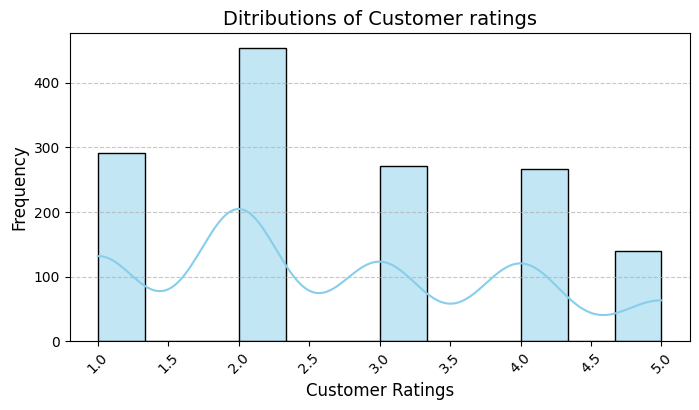

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(clean_data["CustomerRating"], bins= 'auto', kde= True, color="skyblue") #we can write 'bins= 'auto'' for choosing the best value based on our dataset
plt.title("Ditributions of Customer ratings", fontsize=14)
plt.xlabel("Customer Ratings", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha= 0.7)
plt.show()

Q.16 Pie chart

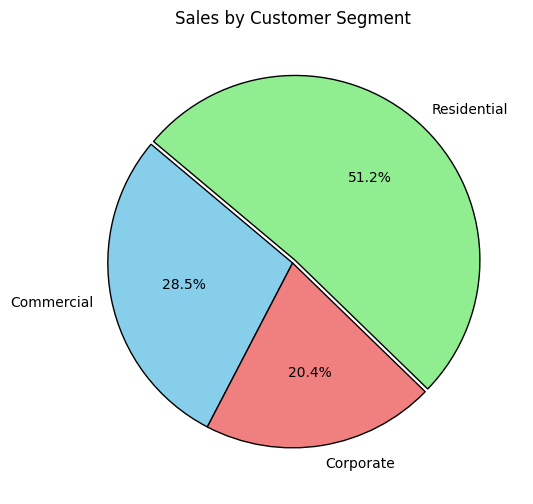

In [32]:
clean_data["Total Sales"]= clean_data[sales_columns].sum(axis=1)
segment_sales= clean_data.groupby("CustomerSegment")["Total Sales"].sum()
plt.figure(figsize=(6,6))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', colors= ["skyblue", "lightcoral", "lightgreen"], 
        startangle= 140, explode=[0, 0, 0.02], 
        wedgeprops={'edgecolor': 'black'}) #to modify the appearance of the slices of pie chart use 'wedgedrops' dictionary
plt.title("Sales by Customer Segment")
plt.show()

Q. 17 Scatter Plot

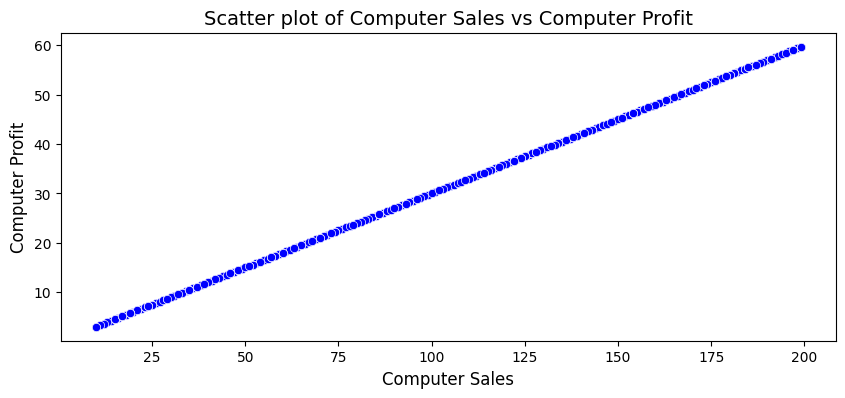

In [33]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x= clean_data['ComputerSales'], y= clean_data['ComputerProfit'], color= 'blue')
plt.title("Scatter plot of Computer Sales vs Computer Profit", fontsize= 14)
plt.xlabel("Computer Sales", fontsize= 12)
plt.ylabel("Computer Profit", fontsize= 12)
plt.show()

Q.18 Boxplot

C:\Users\najmu\AppData\Local\Temp\ipykernel_12008\3930024851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Profit', data= clean_data, palette="coolwarm") #for Boxplot


<function matplotlib.pyplot.show(close=None, block=None)>

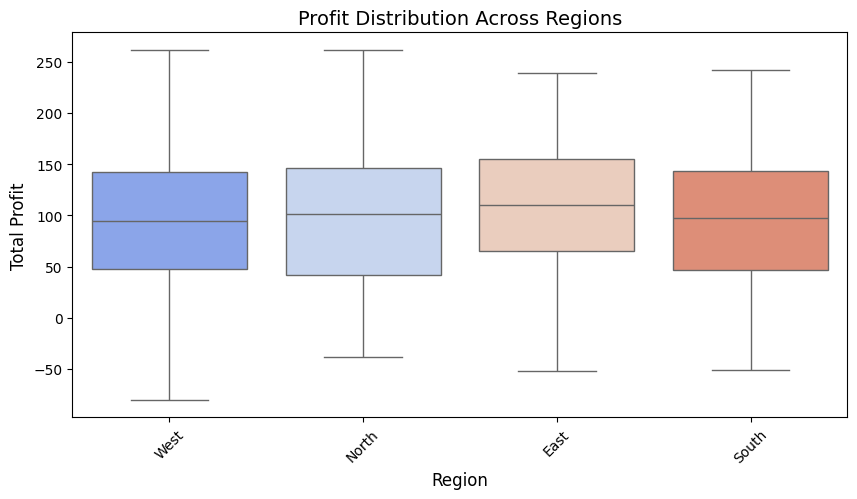

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Region', y='Profit', data= clean_data, palette="coolwarm") #for Boxplot 
plt.title("Profit Distribution Across Regions", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Profit", fontsize=12)
plt.xticks(rotation=45)
plt.show

Q.19 Line Chart

C:\Users\najmu\AppData\Local\Temp\ipykernel_12008\3483477476.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales= clean_data.groupby('Month')[sales_columns].sum()


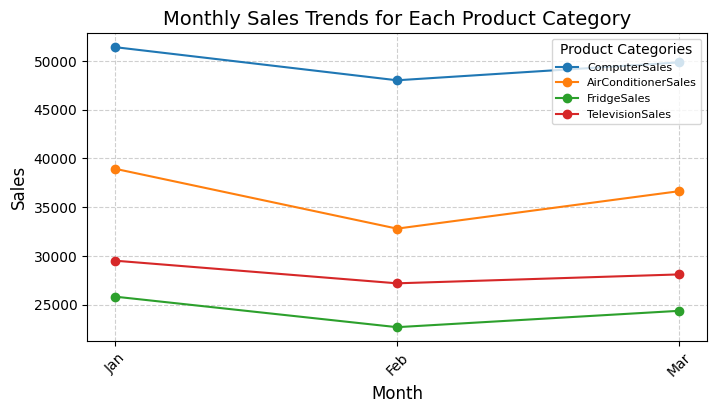

In [35]:
month_orderly= ["Jan", "Feb", "Mar"]
clean_data['Month']= pd.Categorical(clean_data['Month'], categories= month_orderly, ordered= True) #to convert 'Month' column to a ctegorical column to maintain ordered categorical variable(jan-feb-mar)

monthly_sales= clean_data.groupby('Month')[sales_columns].sum()
plt.figure(figsize=(8, 4))
for col in monthly_sales.columns:
    plt.plot(monthly_sales.index, monthly_sales[col], marker='o', label= col)
plt.title("Monthly Sales Trends for Each Product Category", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Product Categories",fontsize= 8, loc= 'best') #for location of legend at plot used arument 'loc='
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [36]:
monthly_sales

,ComputerSales,AirConditionerSales,FridgeSales,TelevisionSales
Month,,,,
Jan,51407.0,38936,25827,29515
Feb,48012.0,32802,22699,27195
Mar,49848.0,36639,24374,28107
